# Bayesian inference of the bentness of a coin

In [1]:
%matplotlib inline
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rng
np.set_printoptions(precision = 2, suppress = True)

import math, time
true_bentness =0.4                   #  <---------- set the true bentness to something here.

possible_bentnesses = np.linspace(0, 1, 51)
rng.seed(int(time.time())) # seed the random number generator

In [2]:
def toss_once(tossdata, prior, X, true_bentness):
    options = ['T','H']
    plt.clf()
    plt.fill_between(X,0,prior,color=[.2,.5,.7]) # shows the current prior as blue. Prettier than plot!
    r = rng.random()
    tossdata.append(options[int(r < true_bentness)])  # tosses a coin and stores
    if tossdata[-1] is options[1]:
        likelihood = X
    else:
        likelihood = 1 - X
    posterior = prior * likelihood                    # multiply the prior by the likelihood
    z = plt.plot(X,likelihood,'-k',linewidth=2)
    posterior = posterior/np.sum(posterior) *len(X)          # re-normalise Y values (ie. ensure area under curve = 1)
    return tossdata, posterior

In [3]:
data = []
prior = np.ones(np.shape(possible_bentnesses)) # start off with this "flat" prior over bentness

Now a big loop of data gathering:

**select the cell below, and press Ctrl-Enter, repeatedly**

Data:  T,T,T,T,T,H,T,H


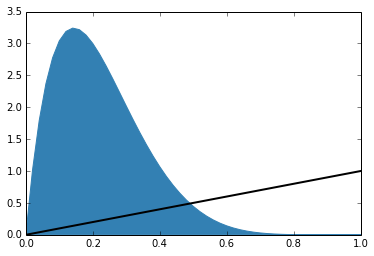

In [11]:
data, posterior = toss_once(data, prior, possible_bentnesses, true_bentness)
prior = posterior
print ('Data: ', ','.join(data))

So... 
In "tossonce" X is the domain of possible values for the bentness, where bentness is defined to be the probability of heads in the frequentist sense, for this coin.

We're in the business of arriving at a degree of belief for various values the true bentness might be. We're achieving this using the sum and product rule only.
There is NO optimization happening here: we're simply updating beliefs in the light of new data.

How we do that:
   * everytime there's a "Head" the likelihood of that is the bentness itself, so we multiply the prior by that, for all values of b we're interested in (which is heaps of discrete possibilities here between 0 and 1).
   * everytime there's a "Tail" the likelihood is 1 minus the bentness, so... ditto.
   * we need to ensure the posterior distribution is _normalised_ , meaning the density would sum to 1 if we integrated it over the domain. Easily done here (but often hard to do in more realistic sized inference problems)

Finally, let's do the same thing a bunch of times and see if the result is "correct".

NUMBER OF DATA POINTS: 108
TRUE BENTNESS: 0.400000
MAP ESTIMATE: 0.460000


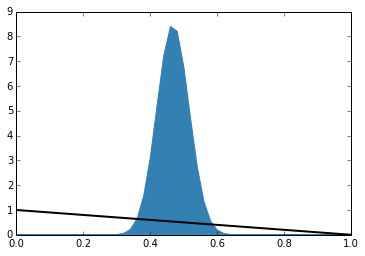

In [12]:
for t in range(100):
    data, posterior = toss_once(data, prior, possible_bentnesses, true_bentness)
    prior = posterior
print ('NUMBER OF DATA POINTS: %d' %(len(data)))
print ('TRUE BENTNESS: %f' %(true_bentness))
print ('MAP ESTIMATE: %f' %(possible_bentnesses[np.argmax(posterior)]))